In [0]:
!wget https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv

--2019-04-21 17:42:33--  https://raw.githubusercontent.com/wshuyi/demo-customer-churn-ann/master/customer_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘customer_churn.csv.7’

customer_churn.csv. 100%[===================>] 668.81K  --.-KB/s    in 0.02s   

2019-04-21 17:42:33 (32.0 MB/s) - ‘customer_churn.csv.7’ saved [684858/684858]



In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("customer_churn.csv")

In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking for the counts in the imbalanced datasets

Exited 1: 2037
Exited 0: 7963
Proportion: 3.91 : 1


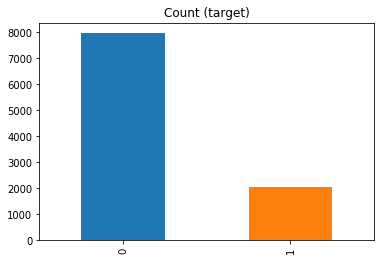

In [0]:
import numpy as np

target_count = df.Exited.value_counts()
print('Exited 1:', target_count[1])
print('Exited 0:', target_count[0])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Resampling to address the unbalanced data problem. 
Undersampling with Random Samples


In [0]:
# Class count
count_class_0, count_class_1 = df.Exited.value_counts()
# Divide by class
df_class_0 = df[df['Exited'] == 0]
df_class_1 = df[df['Exited'] == 1]
print(df_class_0.head())
print(df_class_1.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
1          2    15647311      Hill          608     Spain  Female   41   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
6          7    15592531  Bartlett          822    France    Male   50   
8          9    15792365        He          501    France    Male   44   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
1       1   83807.86              1          0               1   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
6       7       0.00              2          1               1   
8       4  142051.07              2          0               1   

   EstimatedSalary  Exited  
1        112542.58       0  
3         93826.63       0  
4         79084.10       0  
6         10062.80       0  
8         749

Random under-sampling:
1    2037
0    2037
Name: Exited, dtype: int64


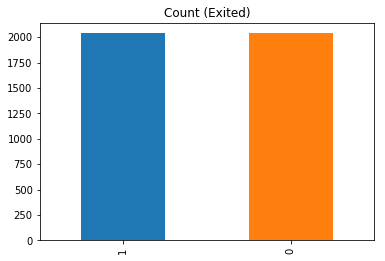

In [0]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

df_test_under.Exited.value_counts().plot(kind='bar', title='Count (Exited)');

In [0]:
print(df_test_under)

      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
2127       2128    15703482       Walker          710   Germany    Male   34   
324         325    15682757       Pardey          734    France    Male   30   
3701       3702    15678317      Manfrin          603    France    Male   46   
7039       7040    15631685      Lambert          523   Germany    Male   60   
3359       3360    15747878        Aiken          739     Spain    Male   60   
5375       5376    15705352         Yang          686     Spain    Male   38   
3800       3801    15685314        Noble          850    France  Female   28   
4764       4765    15657637        Ts'ui          696     Spain  Female   36   
5434       5435    15638803    Donaldson          733     Spain  Female   32   
707         708    15773809     Campbell          620    France    Male   42   
310         311    15712287   Pokrovskii          652    France  Female   80   
2059       2060    15668081        Capon

In [0]:
#Rename the dataframe
df = df_test_under
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2127,2128,15703482,Walker,710,Germany,Male,34,9,134260.36,2,1,0,147074.67,0
324,325,15682757,Pardey,734,France,Male,30,3,0.00,2,1,0,107640.25,0
3701,3702,15678317,Manfrin,603,France,Male,46,2,0.00,2,1,1,59563.49,0
7039,7040,15631685,Lambert,523,Germany,Male,60,1,163894.35,1,0,1,57061.71,0
3359,3360,15747878,Aiken,739,Spain,Male,60,4,0.00,1,1,1,51637.67,0


In [0]:
!pip install -q tensorflow==2.0.0-alpha0

In [0]:
import tensorflow as tf
from tensorflow import keras

Implement Scaling to standardized scores (i.e.. z-score)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2127,2128,15703482,Walker,0.616021,Germany,Male,-0.662176,1.369121,0.841308,0.739886,1,0,0.820311,0
324,325,15682757,Pardey,0.860291,France,Male,-1.037313,-0.697368,-1.350871,0.739886,1,0,0.135773,0
3701,3702,15678317,Manfrin,-0.473016,France,Male,0.463235,-1.041783,-1.350871,0.739886,1,1,-0.698786,0
7039,7040,15631685,Lambert,-1.287249,Germany,Male,1.776215,-1.386198,1.325166,-0.747920,0,1,-0.742214,0
3359,3360,15747878,Aiken,0.911181,Spain,Male,1.776215,-0.352953,-1.350871,-0.747920,1,1,-0.836369,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [0]:
train, valid = train_test_split(train, test_size=0.2, random_state=1)

In [0]:
valid.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7998,7999,15772482,Iloerika,1.827193,Germany,Male,-1.224881,-0.697368,0.811022,2.227691,1,0,0.088018,1
357,358,15661629,Ricci,-1.297427,Spain,Male,-0.662176,1.369121,0.713558,-0.747920,1,0,1.292018,1
8306,8307,15777060,Olszewski,1.226696,France,Female,-0.755960,-0.352953,-1.350871,-0.747920,1,0,-1.280013,1
7892,7893,15707025,Fang,-0.015010,Spain,Female,-0.943529,-0.008539,-1.350871,0.739886,1,1,-1.642493,0
6616,6617,15744046,Andrejew,-0.442482,Spain,Male,-0.755960,1.024706,-1.350871,0.739886,1,1,-0.636064,0


In [0]:
from tensorflow import feature_column

In [0]:
tf.random.set_seed(1)

In [0]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
feature_columns = []

In [0]:
for header in numeric_columns:
  feature_columns.append(feature_column.numeric_column(header))

In [0]:
def get_one_hot_rom_categorical(colname):
  categorical = feature_column.categorical_column_with_vocabulary_list(
  colname,
  train[colname].unique().tolist())
  return feature_column.indicator_column(categorical)

In [0]:
for col in categorical_columns:
  feature_columns.append(get_one_hot_rom_categorical(col))

In [0]:
feature_columns

[NumericColumn(key='CreditScore', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Tenure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Balance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='NumOfProducts', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='EstimatedSalary', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Geography', vocabulary_list=('Spain', 'France', 'Germany'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Gender', vocabulary_list=('Female', 'Male'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(c

In [0]:
from tensorflow.keras import layers

In [0]:
feature_layer = layers.DenseFeatures(feature_columns)

In [0]:
feature_layer

In [0]:
model = keras.Sequential()
model.add(feature_layer)
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
def df_to_tfdata(df, shuffle=True, bs=32):
  df = df.copy()
  labels = df.pop('Exited')
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df), seed=1)
  ds = ds.batch(bs)
  return ds

In [0]:
train_ds = df_to_tfdata(train)

In [0]:
valid_ds = df_to_tfdata(valid, shuffle=False)
test_ds = df_to_tfdata(test, shuffle=False)

In [0]:
model.fit(train_ds,
         validation_data = valid_ds,
         epochs=5)

Epoch 1/5
82/82 [==============================] - 2s 21ms/step - loss: 0.5831 - accuracy: 0.6432 - val_loss: 0.5055 - val_accuracy: 0.7776
Epoch 2/5
82/82 [==============================] - 2s 19ms/step - loss: 0.5133 - accuracy: 0.7424 - val_loss: 0.4665 - val_accuracy: 0.7853
Epoch 3/5
82/82 [==============================] - 2s 19ms/step - loss: 0.4814 - accuracy: 0.7638 - val_loss: 0.4533 - val_accuracy: 0.7945
Epoch 4/5
82/82 [==============================] - 2s 18ms/step - loss: 0.4676 - accuracy: 0.7680 - val_loss: 0.4512 - val_accuracy: 0.8006
Epoch 5/5
82/82 [==============================] - 2s 18ms/step - loss: 0.4595 - accuracy: 0.7760 - val_loss: 0.4509 - val_accuracy: 0.7975


In [0]:
model.evaluate(test_ds)

26/26 [==============================] - 0s 11ms/step - loss: 0.4712 - accuracy: 0.7656


[0.4712032744517693, 0.7656442]

In [0]:
train.Exited.value_counts()

0    1310
1    1297
Name: Exited, dtype: int64

In [0]:
test.Exited.value_counts()

1    415
0    400
Name: Exited, dtype: int64

Addressed the unbalanced data issues with a ramdom undersampling approach. Then any numerical values are standardized by scaling. This is only one example of how to address inbalanced data. We can also try to handle it with random oversampling but each has their pros and cons. 